In [2]:
import torch
import csv
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"C:\Users\jpresman\cernbox\Documents\Projects\ML_Pipeline")
# os.chdir(r"D:\Projects\ML_Pipeline")

%matplotlib inline

## Download Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")

print(f"Dataset downloaded at {path}"   )


Dataset downloaded at C:\Users\jpresman\.cache\kagglehub\datasets\nelgiriyewithana\new-york-housing-market\versions\1


# Frame the problem!

The objective of this project is to predict the price of real estate properties based on various features such as the number of bedrooms, bathrooms, square footage, location, among others.

Additionally, we will build a pipeline using scikit-learn to automate the process of data preprocessing, feature selection, model training, and evaluation.

We will also create derived features that can improve the model's performance, such as the relationship between the number of bedrooms and bathrooms, or the density of bedrooms per square foot.

# Explore data

In [4]:
df = pd.read_csv(r"./data/raw/NY-House-Dataset.csv")

df.head()

BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        MAIN_ADDRESS  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  ADMINISTRATIVE_AREA_LEVEL_2  LOCALITY      SUBLOCALITY       STREET_NAME  \
0             New York County  New York        Manhattan  East 55th Street   
1               United States  New York  New York County          New York   
2               United States  New York  Richmond County     Staten Island   
3               United States  New York  New York County          New York   
4               United States  New York  New York County          New York   

          LONG_NAME                                  FORMATTED_ADDRESS  \
0   Regis Residence  Regis Residence, 2 E 55th St #803, New York, N...   
1  West 57th Street             217 W 57th St, New York, NY 10019, USA   
2   Sinclair Avenue     620 Sinclair Ave, Staten Island, NY 10312, USA   
3  East 55th Street               2 E 55th St, New York, NY 10022, USA   
4  East 64th Street               5 E 64th St, New York, NY 10065, USA   

    LATITUDE  LONGITUDE  
0  40.761255 -73.974483  
1  40.766393 -73.980991  
2  40.541805 -74.196109  
3  40.761398 -73.974613  
4  40.767224 -73.969856

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [6]:
df.describe()

PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450

We have a dataset of 4800 values; it is not a very large dataset, but it is sufficient for an initial analysis.

In [7]:
dropping_cols = ["BROKERTITLE", "TYPE", "MAIN_ADDRESS", "ADDRESS", "STATE", "STREET_NAME", "LONG_NAME", "FORMATTED_ADDRESS", "ADMINISTRATIVE_AREA_LEVEL_2"]

df.drop(columns=dropping_cols, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRICE         4801 non-null   int64  
 1   BEDS          4801 non-null   int64  
 2   BATH          4801 non-null   float64
 3   PROPERTYSQFT  4801 non-null   float64
 4   LOCALITY      4801 non-null   object 
 5   SUBLOCALITY   4801 non-null   object 
 6   LATITUDE      4801 non-null   float64
 7   LONGITUDE     4801 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 300.2+ KB


## Raw Feature

### Location - Price

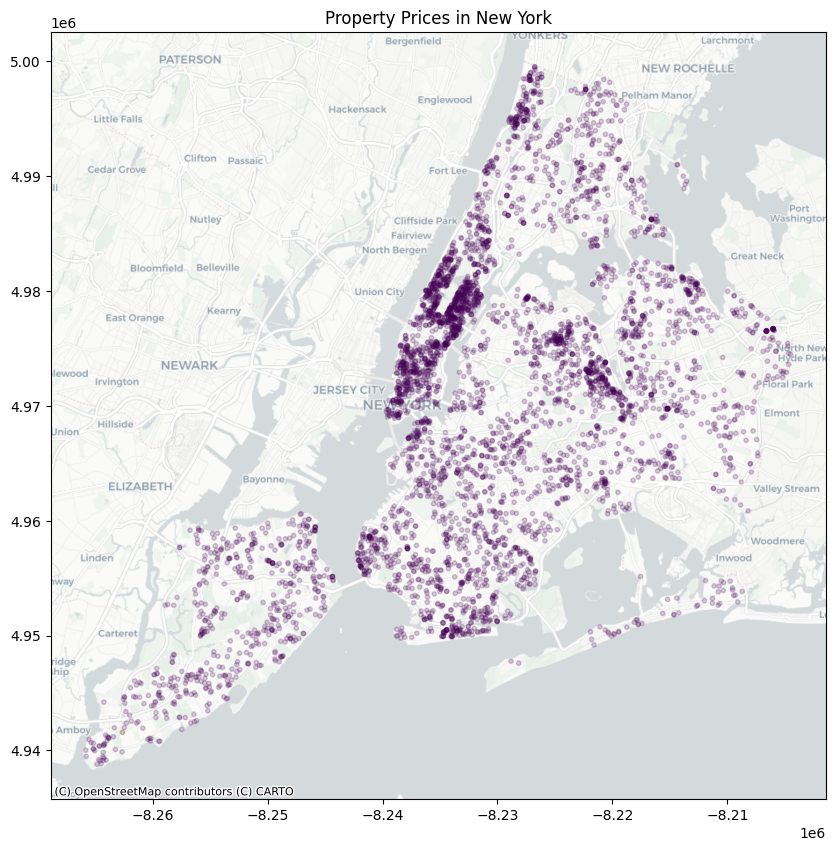

In [8]:
from shapely.geometry import Point
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)

ax = gdf.plot(
    figsize     = (10, 10),
    column      = "PRICE", 
    cmap        = "viridis",        
    markersize  = 10,
    alpha       = 0.2,
    # legend      = True,
    k           = 10
            
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Property Prices in New York")
plt.savefig(r"./reports/figures/price_map.png", dpi=300)
plt.show()



### Distribution of numerical features

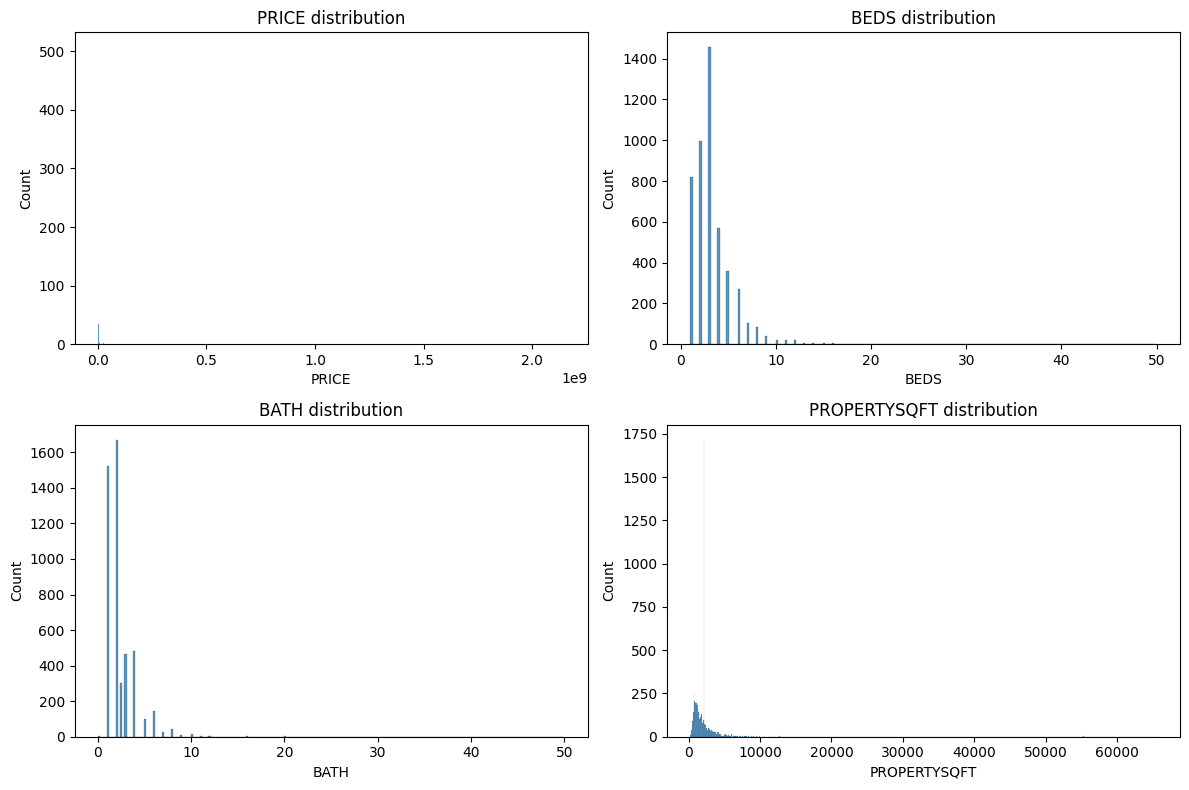

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['PRICE'], ax=axes[0, 0], kde=False)
axes[0, 0].set_title('PRICE distribution')

sns.histplot(df['BEDS'], ax=axes[0, 1], kde=False)
axes[0, 1].set_title('BEDS distribution')

sns.histplot(df['BATH'], ax=axes[1, 0], kde=False)
axes[1, 0].set_title('BATH distribution')

sns.histplot(df['PROPERTYSQFT'], ax=axes[1, 1], kde=False)
axes[1, 1].set_title('PROPERTYSQFT distribution')

plt.tight_layout()
plt.show()

We observe right-skewed distributions, indicating that most properties have lower prices, bedrooms, bathrooms, and square footage, with some properties having much higher values.

We will treat these values as outliers below.

### Outliers in numerical features

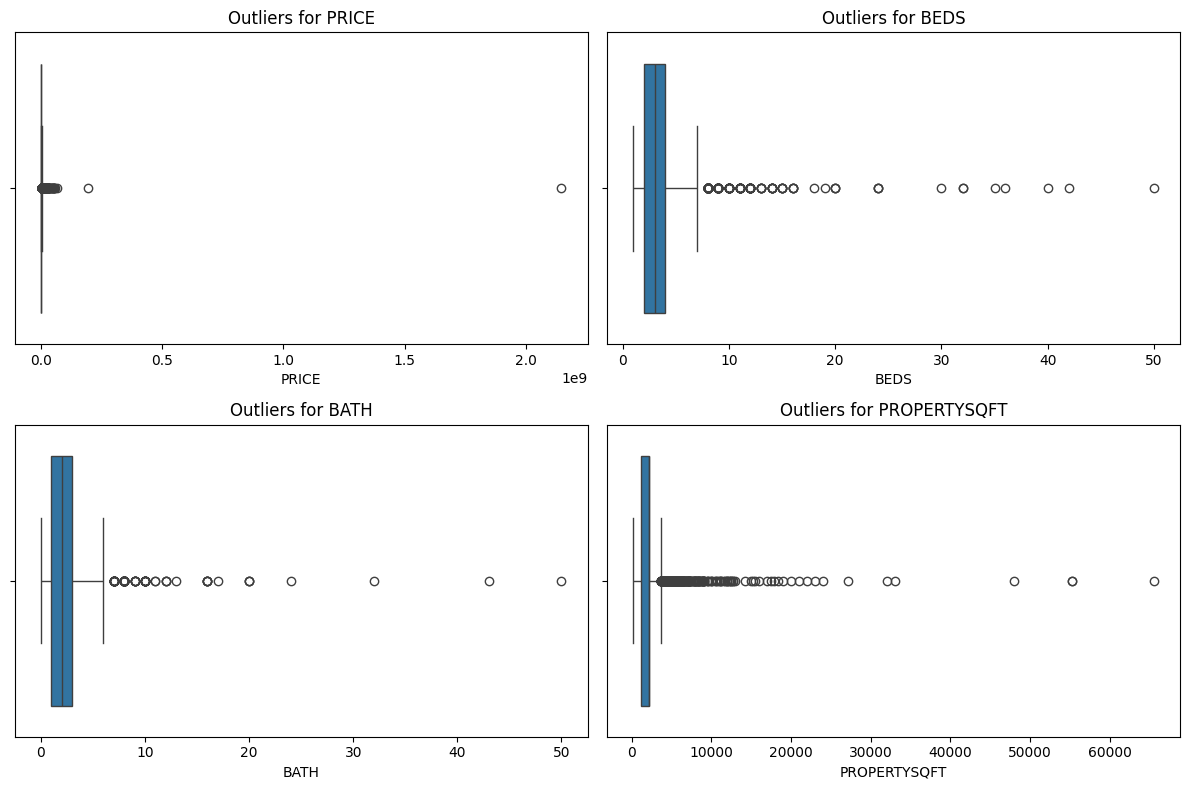

In [10]:
features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Outliers for {feature}')

plt.tight_layout()
plt.show()

In [11]:
# Print median and IQR for each numerical feature
for feature in features:
    median = df[feature].median()
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    # Print median and limits 
    print(f""""Feature {feature}:
            Median: {median}
            Q1: {q1}
            Q3: {q3}
            IQR: {iqr}
            Lower limit: {q1 - 1.5 * iqr}
            Upper limit: {q3 + 1.5 * iqr}
          """)

"Feature PRICE:
            Median: 825000.0
            Q1: 499000.0
            Q3: 1495000.0
            IQR: 996000.0
            Lower limit: -995000.0
            Upper limit: 2989000.0
          
"Feature BEDS:
            Median: 3.0
            Q1: 2.0
            Q3: 4.0
            IQR: 2.0
            Lower limit: -1.0
            Upper limit: 7.0
          
"Feature BATH:
            Median: 2.0
            Q1: 1.0
            Q3: 3.0
            IQR: 2.0
            Lower limit: -2.0
            Upper limit: 6.0
          
"Feature PROPERTYSQFT:
            Median: 2184.207862
            Q1: 1200.0
            Q3: 2184.207862
            IQR: 984.2078620000002
            Lower limit: -276.3117930000003
            Upper limit: 3660.5196550000005
          


We can find some outliers in the numertical features, for example, some houses with + 50 BEDS or BATHS.

### Correlation Matrix

In [12]:
num_vars = ["PRICE", "BEDS", "BATH", "PROPERTYSQFT"]
corr_matrix = df[num_vars].corr(method="pearson")
print(corr_matrix)

                 PRICE      BEDS      BATH  PROPERTYSQFT
PRICE         1.000000  0.052189  0.079371      0.110889
BEDS          0.052189  1.000000  0.776447      0.420503
BATH          0.079371  0.776447  1.000000      0.483935
PROPERTYSQFT  0.110889  0.420503  0.483935      1.000000


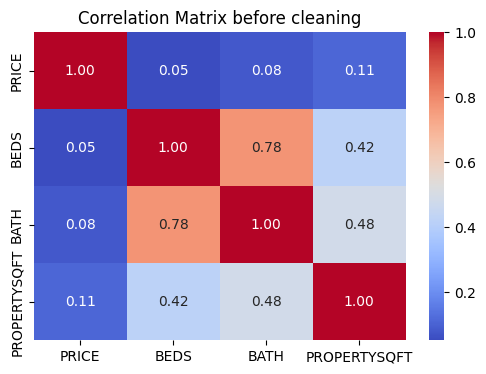

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix before cleaning")
plt.savefig(r"./reports/figures/correlation_matrix_before_cleaning.png", dpi=300)
plt.show()

With this, we can see that in the raw data, there is a low correlation between price and the rest of the numerical features. 

We only found a moderate correlation between PROPERTYSQFT and BEDS and in between BEDS and BATH.

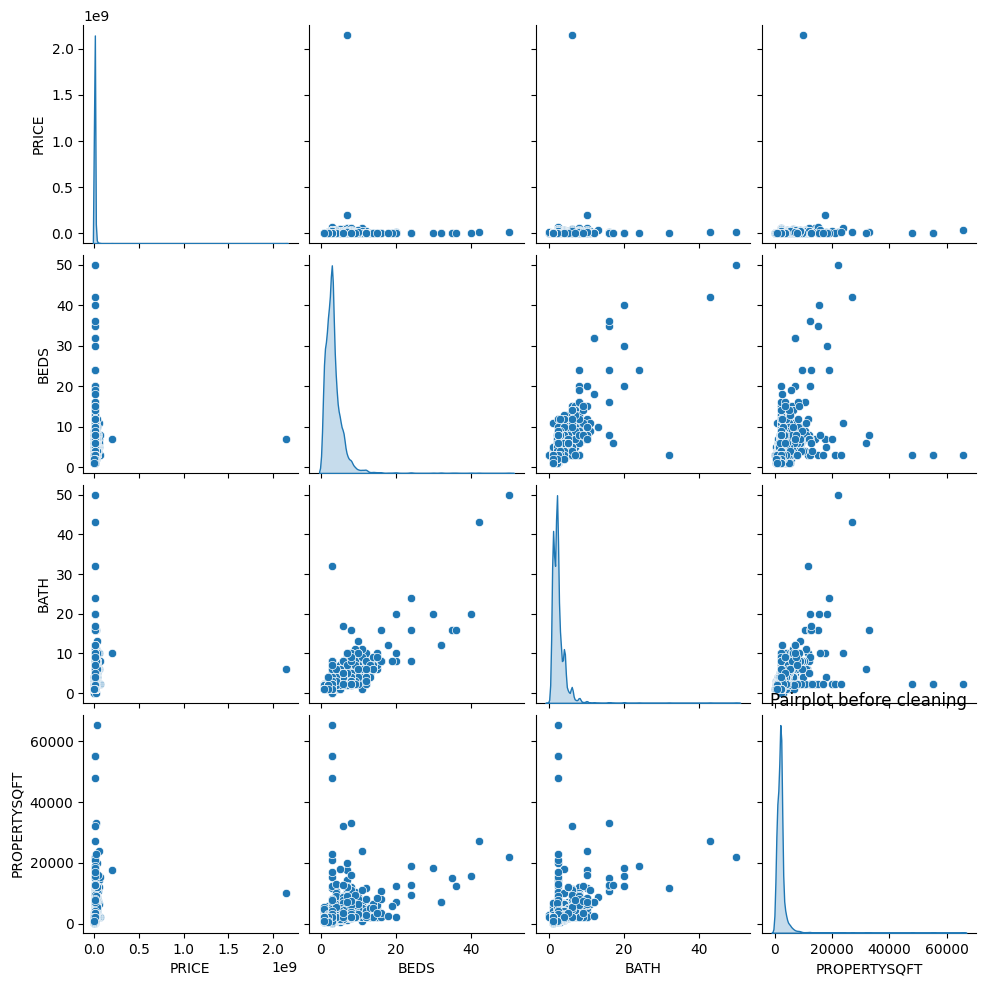

In [14]:
sns.pairplot(df[num_vars], diag_kind="kde")
plt.title("Pairplot before cleaning")
plt.savefig(r"./reports/figures/pairplot_before_cleaning.png", dpi=300)
plt.show()

# Create test set

To avoid biases when evaluating metrics and performing cleanups, we will create a test set from the beginning, which we will only use at the end of the project to evaluate the final model.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

bins    = df["PRICE"].quantile([0.2, 0.4, 0.6, 0.8, 1]).values
labels  = [1, 2, 3, 4, 5]

df["PRICE_CAT"] = pd.cut(
    df["PRICE"],
    bins=np.quantile(df["PRICE"], [0, 0.2, 0.4, 0.6, 0.8, 1.0]),
    labels=[1, 2, 3, 4, 5],
    include_lowest=True
)

# 2. Configure StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_idx, test_idx in split.split(df, df["PRICE_CAT"]):
    strat_train_set = df.iloc[train_idx]
    strat_test_set  = df.iloc[test_idx]
    
    
strat_train_set.to_csv(r"./data/raw/train.csv", index=False)
strat_test_set.to_csv(r"./data/raw/test.csv", index=False)

In [16]:
df = strat_train_set

# Clean Up

#### Filter Price and PropertySqft outliers

Transform prices to log scale since the distribution is right-skewed.

In [17]:
df["PRICE_LOG"] = np.log1p(df["PRICE"])
df["SQFT_LOG"] = np.log1p(df["PROPERTYSQFT"])

original_df = df.copy()

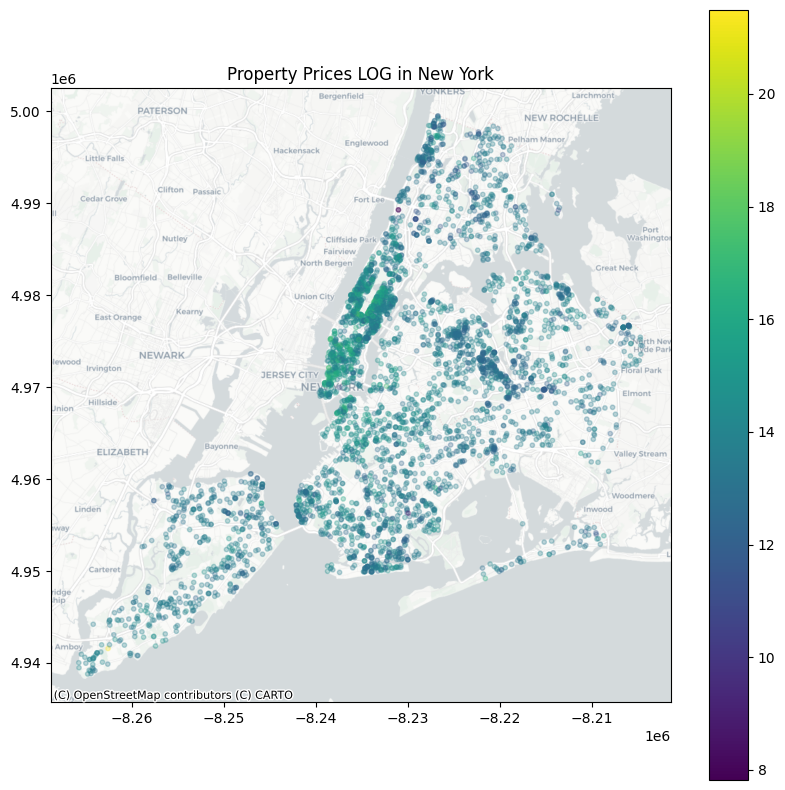

In [18]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

gdf = gdf.to_crs(epsg=3857)

ax = gdf.plot(
    figsize     = (10, 10),
    column      = "PRICE_LOG", 
    cmap        = "viridis",        
    markersize  = 10,
    alpha       = 0.3,
    legend      = True,
    k           = 10
            
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Property Prices LOG in New York")

plt.savefig(r"./reports/figures/price_log_map.png", dpi=300)
plt.show()


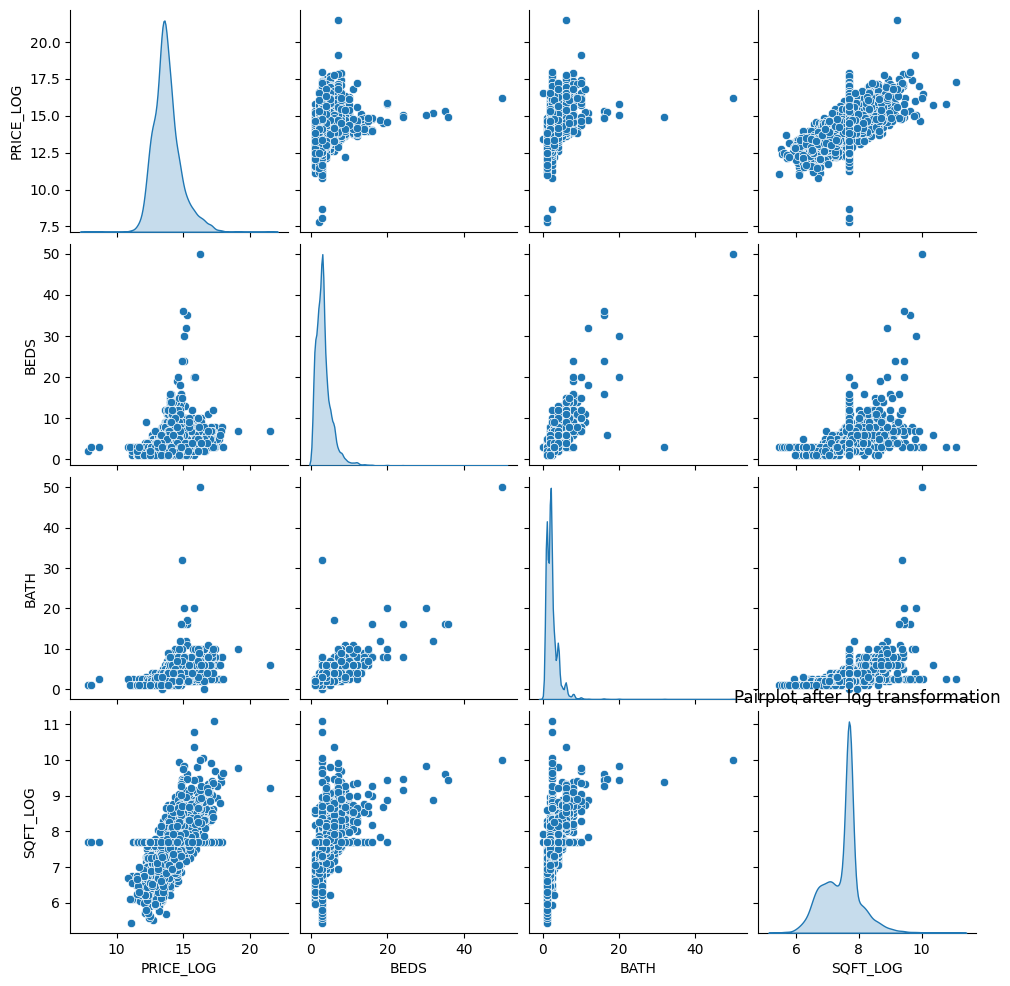

In [19]:
# Pairplot after transformation
sns.pairplot(df[["PRICE_LOG", "BEDS", "BATH", "SQFT_LOG"]], diag_kind="kde")
plt.title("Pairplot after log transformation")
plt.savefig(r"./reports/figures/pairplot_log.png", dpi=300)
plt.show()

##### Price

In [20]:
n_total = len(df)

price_log_q1 = original_df["PRICE_LOG"].quantile(0.25)
price_log_q3 = original_df["PRICE_LOG"].quantile(0.75)
price_log_iqr = price_log_q3 - price_log_q1

upper_limit_price_log = price_log_q3 + 1.5 * price_log_iqr
lower_limit_price_log = price_log_q1 - 1.5 * price_log_iqr

df = df[
    (df["PRICE_LOG"] <= upper_limit_price_log) &
    (df["PRICE_LOG"] >= lower_limit_price_log)
    ]

n_after = len(df)

removed = n_total - n_after
print(f"Removed {n_total - n_after} outliers based on PRICE ({removed / n_total:.2%} of total)")
print(f"Removed houses with PRICE_LOG above {upper_limit_price_log:.2f} -> PRICE above {np.expm1(upper_limit_price_log):.2f}")

Removed 193 outliers based on PRICE (4.47% of total)
Removed houses with PRICE_LOG above 15.87 -> PRICE above 7793676.62


##### SQFT

In [21]:
sqft_log_q1 = original_df["SQFT_LOG"].quantile(0.25)
sqft_log_q3 = original_df["SQFT_LOG"].quantile(0.75)

sqft_log_iqr = sqft_log_q3 - sqft_log_q1

upper_limit_sqft_log = sqft_log_q3 + 1.5 * sqft_log_iqr
lower_limit_price_log = sqft_log_q1 - 1.5 * sqft_log_iqr

df = df[
    (df["SQFT_LOG"] <= upper_limit_sqft_log) &
    (df["SQFT_LOG"] >= lower_limit_price_log)
    ]

n_after = len(df)

removed = n_total - n_after
print(f"Removed {n_total - n_after} outliers based on SQFT ({removed / n_total:.2%} of total)")
print(f"Removed houses with SQFT_LOG above {upper_limit_sqft_log:.2f} -> SQFT above {np.expm1(upper_limit_sqft_log):.2f}")

Removed 314 outliers based on SQFT (7.27% of total)
Removed houses with SQFT_LOG above 8.59 -> SQFT above 5362.12


#### Filter BEDS and BATHS outliers

##### BEDS

In [22]:
# before_filtering
n_total = len(df)

beds_q1 = original_df["BEDS"].quantile(0.25)
beds_q3 = original_df["BEDS"].quantile(0.75)
beds_iqr = beds_q3 - beds_q1

upper_limit_beds = beds_q3 + 1.5 * beds_iqr
lower_limit_beds = 1

df = df[
    (df["BEDS"] <= upper_limit_beds) &
    (df["BEDS"] >= lower_limit_beds)
    ]

n_after = len(df)

removed = n_total - n_after

print(f"Removed {n_total - n_after} outliers based on BEDS ({removed / n_total:.2%} of total)")
print(f"Removed houses with BEDS above {upper_limit_beds} beds")

Removed 138 outliers based on BEDS (3.44% of total)
Removed houses with BEDS above 7.0 beds


##### BATHS

In [23]:
# before_filtering
n_total = len(df)

beds_q1 = original_df["BATH"].quantile(0.25)
beds_q3 = original_df["BATH"].quantile(0.75)
beds_iqr = beds_q3 - beds_q1

upper_limit_beds = beds_q3 + 1.5 * beds_iqr
lower_limit_beds = 1

df = df[
    (df["BATH"] <= upper_limit_beds) &
    (df["BATH"] >= lower_limit_beds)
    ]

n_after = len(df)

removed = n_total - n_after

print(f"Removed {n_total - n_after} outliers based on BATHS ({removed / n_total:.2%} of total)")
print(f"Removed houses with BATHS above {upper_limit_beds} beds")

Removed 11 outliers based on BATHS (0.28% of total)
Removed houses with BATHS above 6.0 beds


In [24]:
# Total rows removed
total_removed = len(original_df) - len(df)
print(f"Total rows removed: {total_removed} ({total_removed / len(original_df):.2%} of total)")

Total rows removed: 463 (10.72% of total)


After removing outliers in PRICE, PROPERTYSQFT, BEDS, and BATHS, we have eliminated a total of 522 rows, which represents 10.88% of the total data.

It is important to note that we removed outliers both above and below the range, as in the case of BEDS and BATHS, it makes sense to exclude properties with 0 or 1 bedroom or bathroom.

### Distribution of numerical features

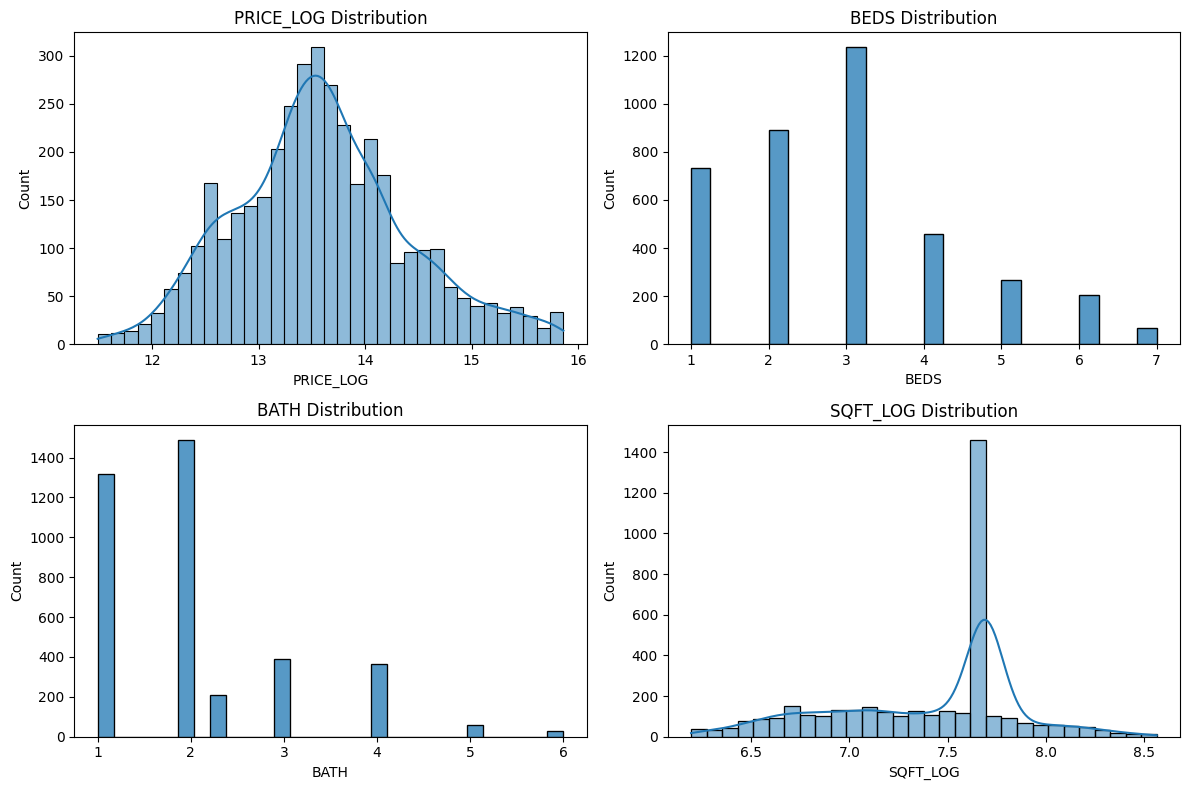

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['PRICE_LOG'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('PRICE_LOG Distribution')

sns.histplot(df['BEDS'], ax=axes[0, 1], kde=False)
axes[0, 1].set_title('BEDS Distribution')

sns.histplot(df['BATH'], ax=axes[1, 0], kde=False)
axes[1, 0].set_title('BATH Distribution')

sns.histplot(df['SQFT_LOG'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('SQFT_LOG Distribution')

plt.tight_layout()
plt.show()

### Price distribution before and after log transformation

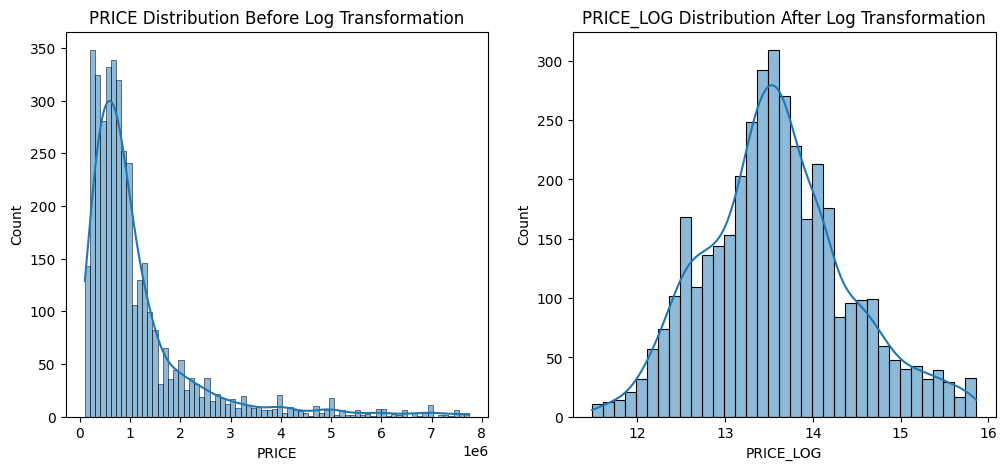

In [26]:
# Plot price distribution before and after log transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['PRICE'], ax=axes[0], kde=True)
axes[0].set_title('PRICE Distribution Before Log Transformation')
sns.histplot(df['PRICE_LOG'], ax=axes[1], kde=True)
axes[1].set_title('PRICE_LOG Distribution After Log Transformation')
plt.savefig(r"./reports/figures/price_distribution_comparison.png", dpi=300)
plt.show()

In [27]:
df["PRICE"].describe()

count    3.857000e+03
mean     1.142073e+06
std      1.188660e+06
min      9.750000e+04
25%      4.700000e+05
50%      7.690000e+05
75%      1.288000e+06
max      7.750000e+06
Name: PRICE, dtype: float64

### Correlation Matrix

In [28]:
num_vars = ["PRICE_LOG", "BEDS", "BATH", "SQFT_LOG"]
corr_matrix = df[num_vars].corr(method="pearson")  # Pearson es lo más común
print(corr_matrix)

           PRICE_LOG      BEDS      BATH  SQFT_LOG
PRICE_LOG   1.000000  0.442126  0.610644  0.464067
BEDS        0.442126  1.000000  0.679120  0.497375
BATH        0.610644  0.679120  1.000000  0.496181
SQFT_LOG    0.464067  0.497375  0.496181  1.000000


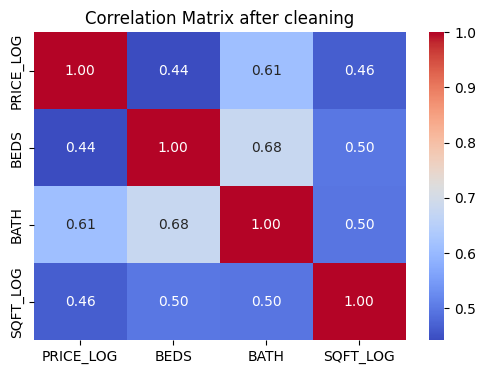

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix after cleaning")
plt.savefig(r"./reports/figures/correlation_matrix_after_cleaning.png", dpi=300)
plt.show()

After cleaning up the data, we can see some interesting correlations:

1. PRICE_LOG has a moderate correlation with SQFT_LOG and BEDS while it is more correlated to BATH number.
2. BATH and BEDS have the highest correlation
3. BATH and BEDS are correlated to SQFT_LOG with a moderate level


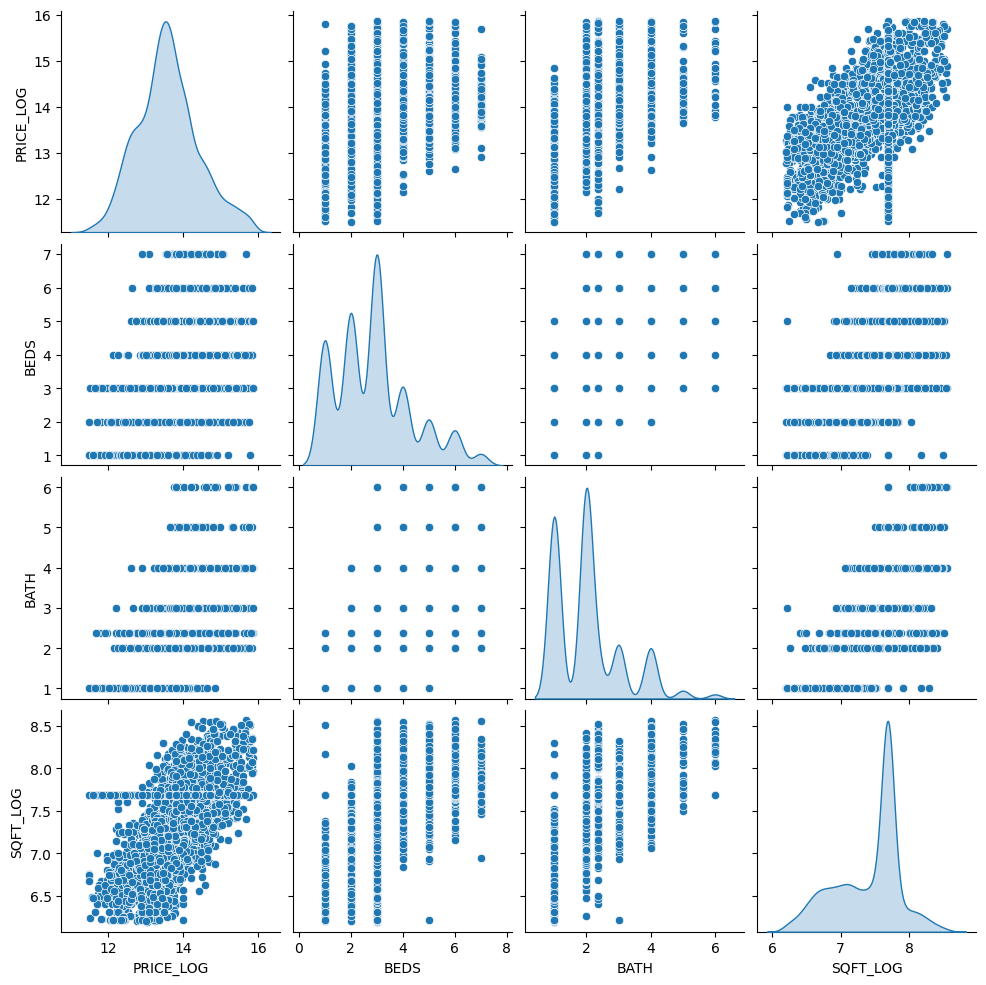

In [30]:
sns.pairplot(df[num_vars], diag_kind="kde")
plt.savefig(r"./reports/figures/pairplot_after_cleaning.png", dpi=300)
plt.show()

When representing the data again, we can clearly see that there is significant dispersion in the data, for example, in BEDS and BATH as a function of price.

Additionally, when comparing SQFT_LOG with PRICE_LOG, we can observe a peak of data around 7.8 SQFT_LOG, which corresponds to ~2400 SQFT, a very common value for houses.

# Fature Engineering

## Extraction

In [31]:
def feature_summary(series: pd.Series, name: str = None):
    q1 = series.quantile(0.25)
    q2 = series.median()
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    outliers = ((series < lower_whisker) | (series > upper_whisker)).sum()
    total = series.count()
    
    print(f"\n📦 Feature Summary: {name if name else series.name}")
    print(f"Count: {total}")
    print(f"Mean: {series.mean():.5f}")
    print(f"Median (Q2): {q2:.5f}")
    print(f"Q1 (25th percentile): {q1:.5f}")
    print(f"Q3 (75th percentile): {q3:.5f}")
    print(f"IQR: {iqr:.5f}")
    print(f"Lower whisker: {lower_whisker:.5f}")
    print(f"Upper whisker: {upper_whisker:.5f}")
    print(f"Min: {series.min():.5f}")
    print(f"Max: {series.max():.5f}")
    print(f"Outliers detected: {outliers} ({100*outliers/total:.5f}%)")


### Structural Features

Describe the structural and physical characteristics of the property.


#### Price per sqft

In [32]:
df["PRICE_PER_SQFT_LOG"] = df["PRICE_LOG"] / df["SQFT_LOG"]

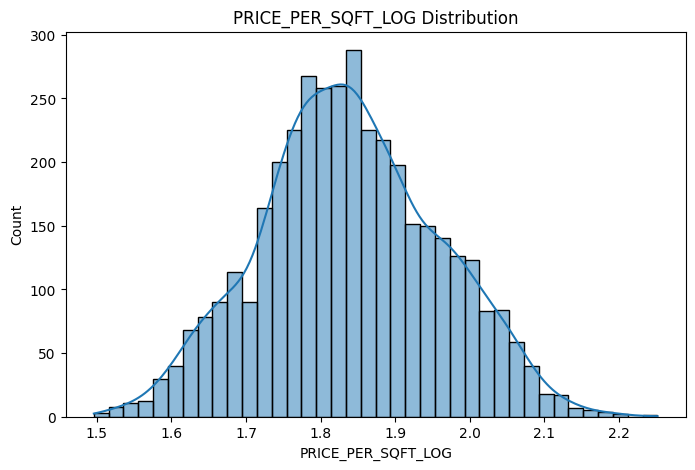

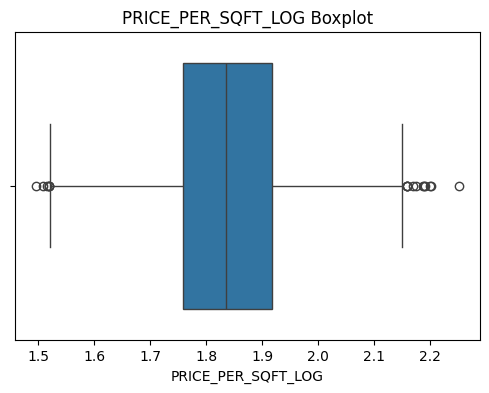

In [33]:
# Histogram and KDE plot for PRICE_PER_SQFT
plt.figure(figsize=(8, 5))
sns.histplot(df['PRICE_PER_SQFT_LOG'], kde=True)
plt.title('PRICE_PER_SQFT_LOG Distribution')
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x=df["PRICE_PER_SQFT_LOG"])
plt.title('PRICE_PER_SQFT_LOG Boxplot')
plt.show()

In [34]:
feature_summary(df["PRICE_PER_SQFT_LOG"], "PRICE_PER_SQFT_LOG")


📦 Feature Summary: PRICE_PER_SQFT_LOG
Count: 3857
Mean: 1.83921
Median (Q2): 1.83545
Q1 (25th percentile): 1.75927
Q3 (75th percentile): 1.91860
IQR: 0.15933
Lower whisker: 1.52027
Upper whisker: 2.15759
Min: 1.49593
Max: 2.25168
Outliers detected: 18 (0.46668%)


#### Beds per sqft

In [35]:
df["BEDS_PER_SQFT"] = df["BEDS"] / df["PROPERTYSQFT"]

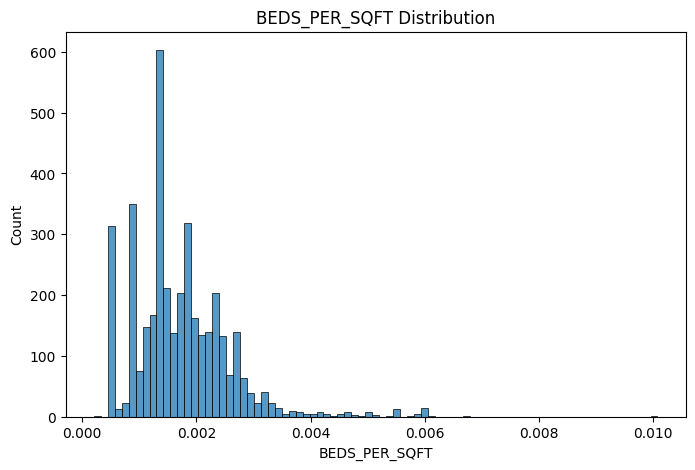

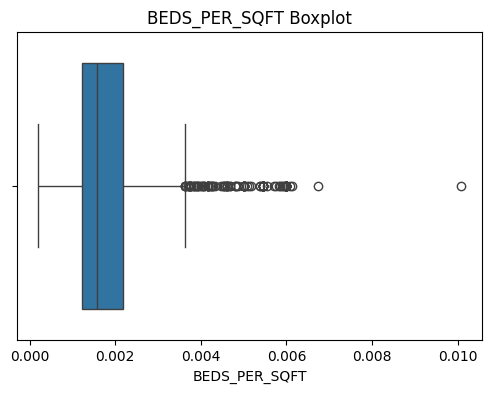

In [36]:
# Histogram and KDE plot for BEDS_PER_SQFT
plt.figure(figsize=(8, 5))
sns.histplot(df['BEDS_PER_SQFT'], kde=False)
plt.title('BEDS_PER_SQFT Distribution')
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x=df["BEDS_PER_SQFT"])
plt.title('BEDS_PER_SQFT Boxplot')
plt.show()

In [37]:
feature_summary(df["BEDS_PER_SQFT"], "BEDS_PER_SQFT")


📦 Feature Summary: BEDS_PER_SQFT
Count: 3857
Mean: 0.00172
Median (Q2): 0.00157
Q1 (25th percentile): 0.00122
Q3 (75th percentile): 0.00219
IQR: 0.00097
Lower whisker: -0.00023
Upper whisker: 0.00363
Min: 0.00020
Max: 0.01008
Outliers detected: 102 (2.64454%)


#### Baths per sqft

In [38]:
df["BATH_PER_SQFT"] = df["BATH"] / df["PROPERTYSQFT"]

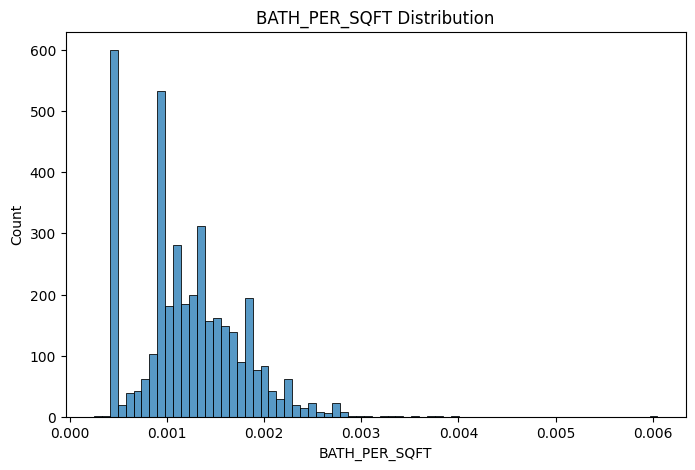

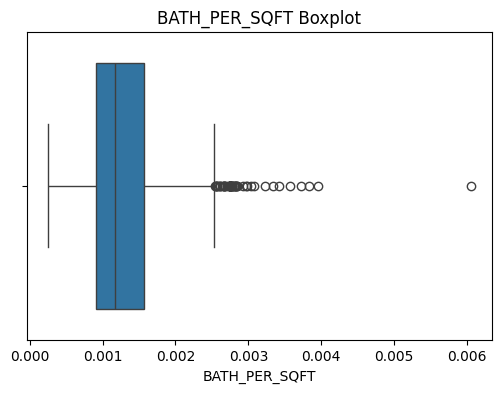

In [39]:
# Histogram and KDE plot for BATH_PER_SQFT
plt.figure(figsize=(8, 5))
sns.histplot(df['BATH_PER_SQFT'], kde=False)
plt.title('BATH_PER_SQFT Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["BATH_PER_SQFT"])
plt.title('BATH_PER_SQFT Boxplot')
plt.show()



In [40]:
feature_summary(df["BATH_PER_SQFT"], "BATH_PER_SQFT")


📦 Feature Summary: BATH_PER_SQFT
Count: 3857
Mean: 0.00122
Median (Q2): 0.00118
Q1 (25th percentile): 0.00092
Q3 (75th percentile): 0.00156
IQR: 0.00065
Lower whisker: -0.00005
Upper whisker: 0.00253
Min: 0.00025
Max: 0.00605
Outliers detected: 57 (1.47783%)


#### RBF over SQRFT

Center point for RBF Kernel: [[7.68946623]]


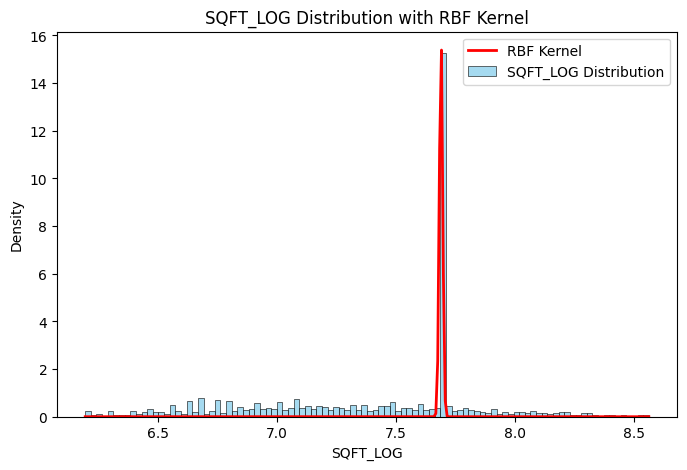

PRICE  BEDS      BATH  PROPERTYSQFT         LOCALITY      SUBLOCALITY  \
1400   129000     3  1.000000   2184.207862    Queens County           Queens   
2974  6000000     4  4.000000   2184.207862  New York County         New York   
3074   709999     4  2.000000   2184.207862         New York    Queens County   
2638  2399000     5  5.000000   2184.207862         New York     Kings County   
4546  1299000     6  2.373861   3733.000000         New York  Richmond County   
...       ...   ...       ...           ...              ...              ...   
4166  6350000     4  4.000000   2184.207862  New York County         New York   
2278   649000     3  3.000000   1456.000000         New York  Richmond County   
2801   995000     1  1.000000   2184.207862     Kings County         Brooklyn   
4243  2649000     3  3.000000   1500.000000  New York County         New York   
325   2350000     1  2.000000   1144.000000         New York  New York County   

       LATITUDE  LONGITUDE PRICE_CAT  PRICE_LOG  SQFT_LOG  PRICE_PER_SQFT_LOG  \
1400  40.710451 -73.798206         1  11.767575  7.689466            1.530350   
2974  40.762555 -73.970384         5  15.607270  7.689466            2.029695   
3074  40.681188 -73.793438         3  13.473020  7.689466            1.752140   
2638  40.611552 -73.906198         5  14.690563  7.689466            1.910479   
4546  40.629844 -74.123387         4  14.077106  8.225235            1.711453   
...         ...        ...       ...        ...       ...                 ...   
4166  40.783670 -73.970927         5  15.663966  7.689466            2.037068   
2278  40.597298 -74.134727         2  13.383190  7.284135            1.837307   
2801  40.720115 -73.958126         3  13.810499  7.689466            1.796028   
4243  40.747335 -73.984862         5  14.789693  7.313887            2.022139   
325   40.744926 -74.005718         5  14.669926  7.043160            2.082861   

      BEDS_PER_SQFT  BATH_PER_SQFT  SQFT_LOG_RBF  
1400       0.001373       0.000458           1.0  
2974       0.001831       0.001831           1.0  
3074       0.001831       0.000916           1.0  
2638       0.002289       0.002289           1.0  
4546       0.001607       0.000636           0.0  
...             ...            ...           ...  
4166       0.001831       0.001831           1.0  
2278       0.002060       0.002060           0.0  
2801       0.000458       0.000458           1.0  
4243       0.002000       0.002000           0.0  
325        0.000874       0.001748           0.0  

[3857 rows x 15 columns]

In [41]:
from sklearn.metrics.pairwise import rbf_kernel

gamma_value = 10000.0

x_range = np.linspace(df["SQFT_LOG"].min(), df["SQFT_LOG"].max(), 300).reshape(-1, 1)

# Extract the center point from DF histogram
center_point = np.array([[df["SQFT_LOG"].median()]])
print(f"Center point for RBF Kernel: {center_point}")

# Compute RBF kernel values
rbf_curve = rbf_kernel(x_range, center_point, gamma=gamma_value).flatten()

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(df["SQFT_LOG"], kde=False, stat="density", bins=100, color="skyblue", label="SQFT_LOG Distribution")

# Escalar la curva para que se vea comparable al histograma
rbf_curve_scaled = rbf_curve * 16  # factor arbitrario para que se note en el gráfico
plt.plot(x_range, rbf_curve_scaled, color="red", linewidth=2, label="RBF Kernel")

plt.title("SQFT_LOG Distribution with RBF Kernel")
plt.xlabel("SQFT_LOG")
plt.ylabel("Density")
plt.legend()
plt.show()

df["SQFT_LOG_RBF"] = rbf_kernel(df[["SQFT_LOG"]], center_point, gamma=gamma_value).flatten()
df

#### Plotting

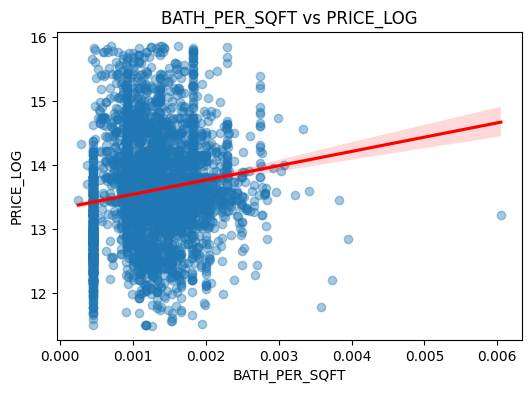

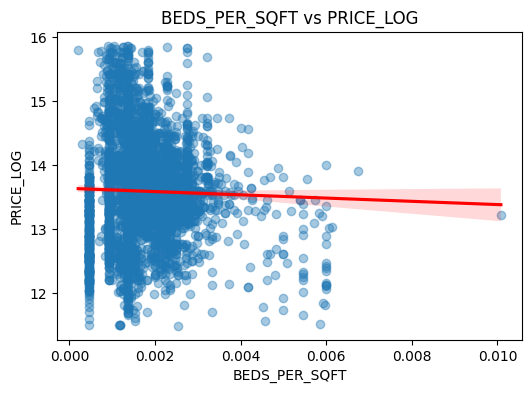

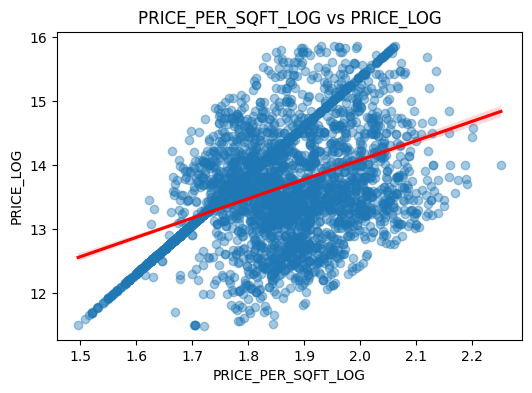

In [42]:

features = ["BATH_PER_SQFT", "BEDS_PER_SQFT", "PRICE_PER_SQFT_LOG"]

for f in features:
    plt.figure(figsize=(6,4))
    sns.regplot(x=df[f], y=df["PRICE_LOG"], scatter_kws={"alpha":0.4}, line_kws={"color":"red"})
    plt.title(f"{f} vs PRICE_LOG")
    plt.show()

### Geospatial Features

Location-based features that capture the geographical context of the property.

Here we analyze geospatial features, such as the distance to points of interest like Manhattan, and also examine the location of the properties themselves.

Above all, we need to determine whether values like locality or sublocality make sense and provide relevant information.

Additionally, new information will be created using clustering with KMeans.

#### Distance to Manhattan

With this, we measure the straight-line distance to Manhattan, which is the nerve center of New York and where most attractions, services, and job opportunities are located.

Although this distance does not account for the actual distance by road, public transport, or walking, information that could be more relevant.

In [43]:
lat_c, lon_c = 40.7831, -73.9712

df["DIST_TO_MANHATTAN"] = np.sqrt(
    (df["LATITUDE"] - lat_c) ** 2 + (df["LONGITUDE"] - lon_c) ** 2
)

#### Distance to jfk airport

In [44]:
lat_c, lon_c = 40.6413, -73.7781
df["DIST_TO_JFK_AIRPORT"] = np.sqrt(
    (df["LATITUDE"] - lat_c) ** 2 + (df["LONGITUDE"] - lon_c) ** 2
)

#### Disntace to laguardia airport

In [45]:
lat_c, lon_c = 40.7769, -73.8740
df["DIST_TO_LAGUARDIA_AIRPORT"] = np.sqrt(
    (df["LATITUDE"] - lat_c) ** 2 + (df["LONGITUDE"] - lon_c) ** 2
)

#### Distance to times square

In [46]:
lat_c, lon_c = 40.7580, -73.9855
df["DIST_TO_TIMES_SQUARE"] = np.sqrt(
    (df["LATITUDE"] - lat_c) ** 2 + (df["LONGITUDE"] - lon_c) ** 2
)

#### Locality

In [47]:
# Define top 10 localities
top_n = 10
top_localities = df["LOCALITY"].value_counts().nlargest(top_n).index

# Create a new column grouping less frequent localities into "Other"
df["LOCALITY_GROUPED"] = df["LOCALITY"].apply(
    lambda x: x if x in top_localities else "Other"
)

print(df["LOCALITY_GROUPED"].value_counts())


LOCALITY_GROUPED
New York           1899
New York County     801
Queens County       494
Kings County        406
Bronx County        161
Richmond County      48
United States        31
Brooklyn              6
Queens                5
The Bronx             5
Other                 1
Name: count, dtype: int64


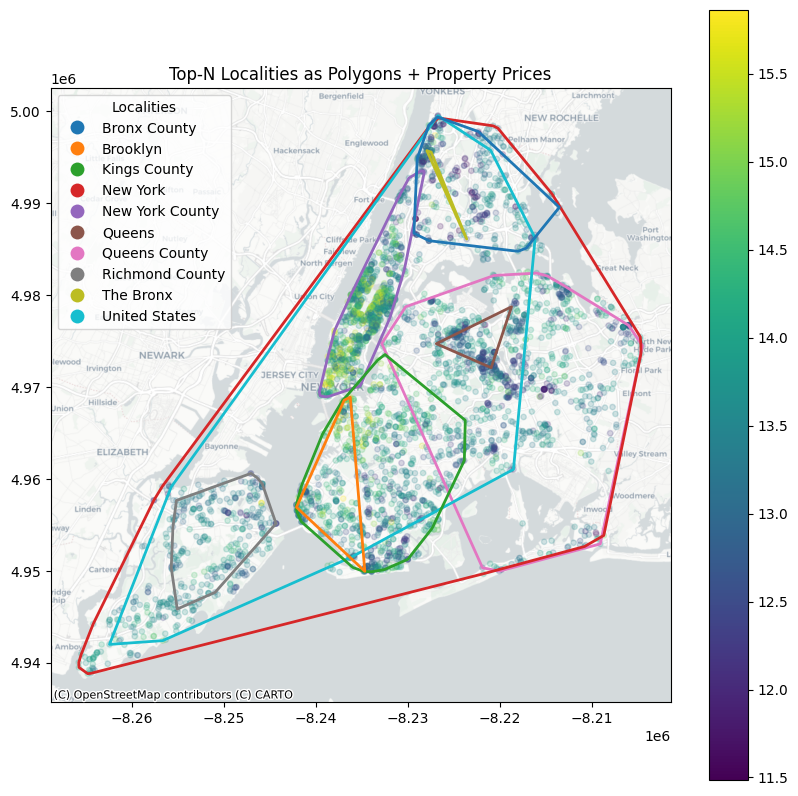

In [48]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326").to_crs(epsg=3857)

# Create polygons per locality_grouped
locality_polygons = []
for locality in gdf["LOCALITY_GROUPED"].unique():
    locality_points = gdf[gdf["LOCALITY_GROUPED"] == locality].geometry
    if len(locality_points) > 2:  # convex hull necesita >=3 puntos
        locality_polygons.append((locality, locality_points.union_all().convex_hull))

# GeoDataFrame with polygons
localities_gdf = gpd.GeoDataFrame(
    locality_polygons, columns=["LOCALITY_GROUPED", "geometry"], crs=gdf.crs
)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 10))

# Houses colored by price
gdf.plot(
    ax          = ax,
    column      = "PRICE_LOG",
    cmap        = "viridis",
    markersize  = 15,
    alpha       = 0.2,
    legend      = True
)

# Locality polygons
localities_gdf.plot(
    ax          = ax,
    column      = "LOCALITY_GROUPED",
    categorical = True,
    cmap        = "tab10",      
    linewidth   = 2,
    edgecolor   = None,    
    facecolor   = "none", 
    legend      = True,
    legend_kwds = {"title": "Localities"}  
)

# Basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Top-N Localities as Polygons + Property Prices")
plt.savefig(r"./reports/figures/localities_map.png", dpi=300)
plt.show()

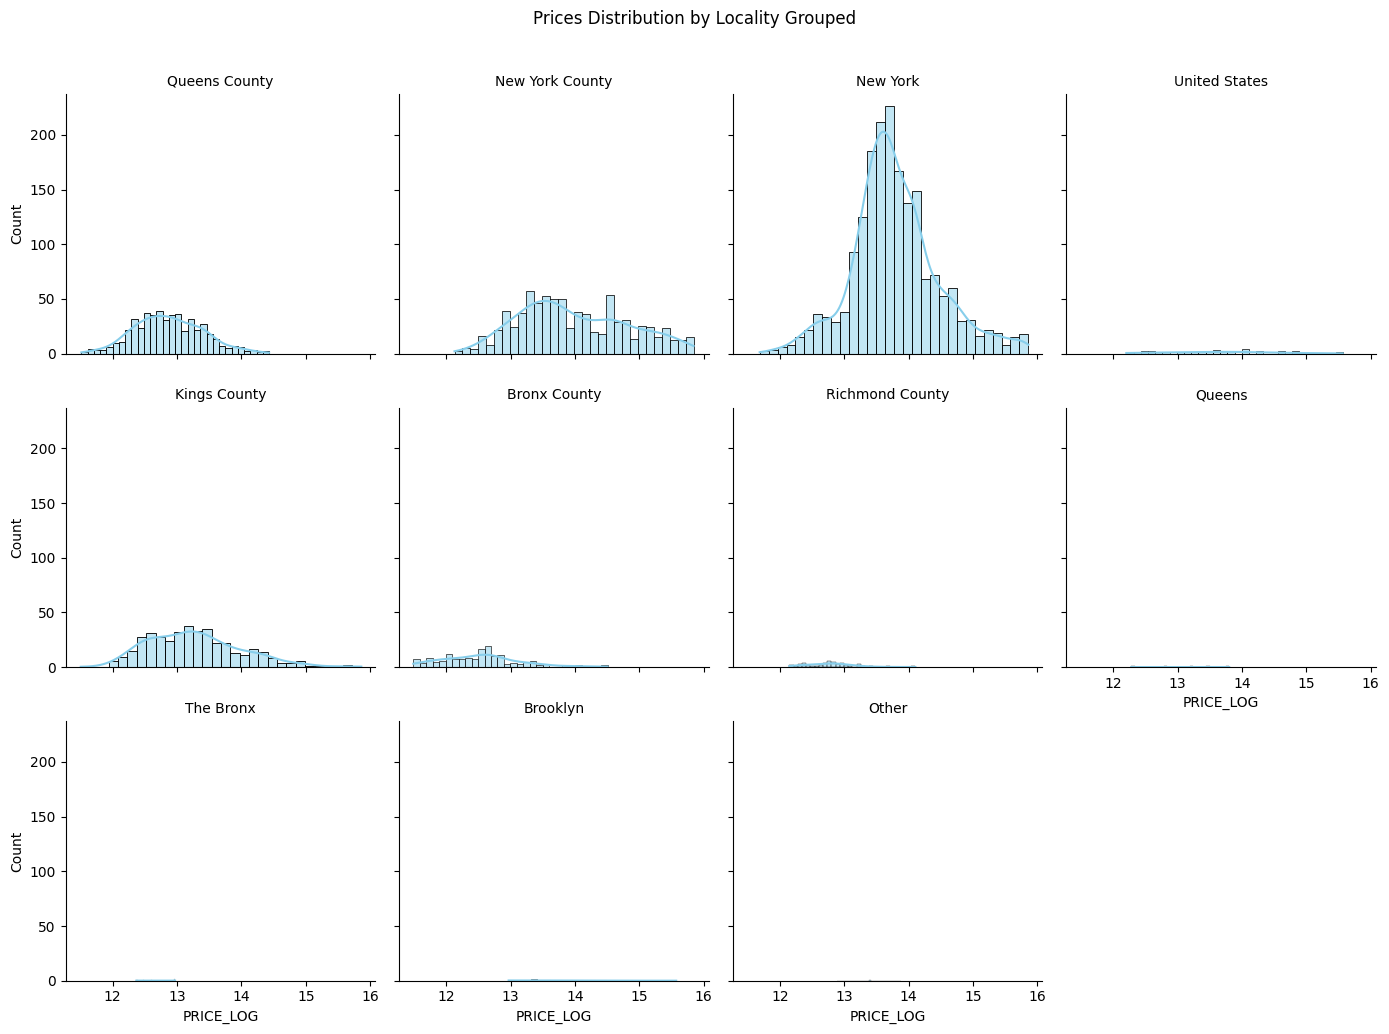

In [49]:
g = sns.FacetGrid(gdf, col="LOCALITY_GROUPED", col_wrap=4, height=3.5, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="PRICE_LOG", bins=30, kde=True, color="skyblue")

g.set_axis_labels("PRICE_LOG", "Count")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Prices Distribution by Locality Grouped")
plt.savefig(r"./reports/figures/price_log_by_locality.png", dpi=300)
plt.show()

It can be seen that the data does not make much sense.

There are localities such as "United States" or "New York" that do not add value and also have very disparate prices or they cover very large areas.

This indicates that this feature is not relevant and does not add value.

#### Sublocality

In [50]:
# Define top 10 localities
top_n = 10
top_localities = df["SUBLOCALITY"].value_counts().nlargest(top_n).index

# Create a new column grouping less frequent localities into "Other"
df["SUBLOCALITY_GROUPED"] = df["SUBLOCALITY"].apply(
    lambda x: x if x in top_localities else "Other"
)

print(df["SUBLOCALITY_GROUPED"].value_counts())


SUBLOCALITY_GROUPED
New York           832
Kings County       571
Queens County      569
Queens             492
Brooklyn           406
Richmond County    398
Bronx County       229
The Bronx          163
New York County    114
Staten Island       48
Other               35
Name: count, dtype: int64


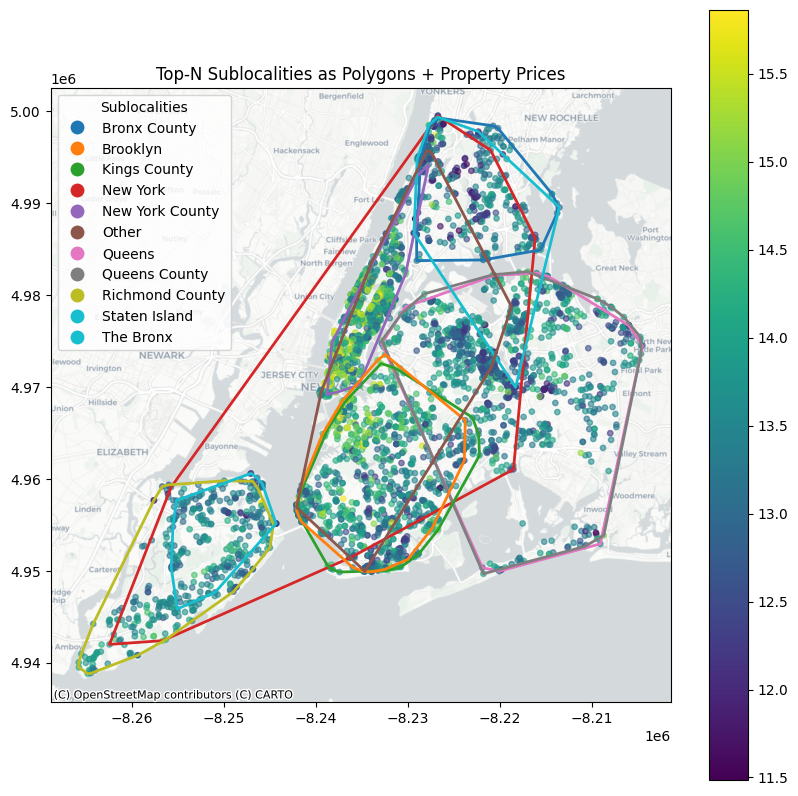

In [51]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326").to_crs(epsg=3857)

# Create polygons per SUBLOCALITY_GROUPED
locality_polygons = []
for locality in gdf["SUBLOCALITY_GROUPED"].unique():
    locality_points = gdf[gdf["SUBLOCALITY_GROUPED"] == locality].geometry
    if len(locality_points) > 2:  
        locality_polygons.append((locality, locality_points.union_all().convex_hull))

# GeoDataFrame with polygons
localities_gdf = gpd.GeoDataFrame(
    locality_polygons, columns=["SUBLOCALITY_GROUPED", "geometry"], crs=gdf.crs
)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 10))

# Houses colored by price
gdf.plot(
    ax          = ax,
    column      = "PRICE_LOG",
    cmap        = "viridis",
    markersize  = 15,
    alpha       = 0.6,
    legend      = True
)

# Sublocality polygons
localities_gdf.plot(
    ax          = ax,
    column      = "SUBLOCALITY_GROUPED",
    categorical = True,
    cmap        = "tab10",      
    linewidth   = 2,
    facecolor   = "none", 
    legend      = True,      
    legend_kwds = {"title": "Sublocalities"} 
)

# Basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Top-N Sublocalities as Polygons + Property Prices")
plt.savefig(r"./reports/figures/sublocalities_map.png", dpi=300)
plt.show()

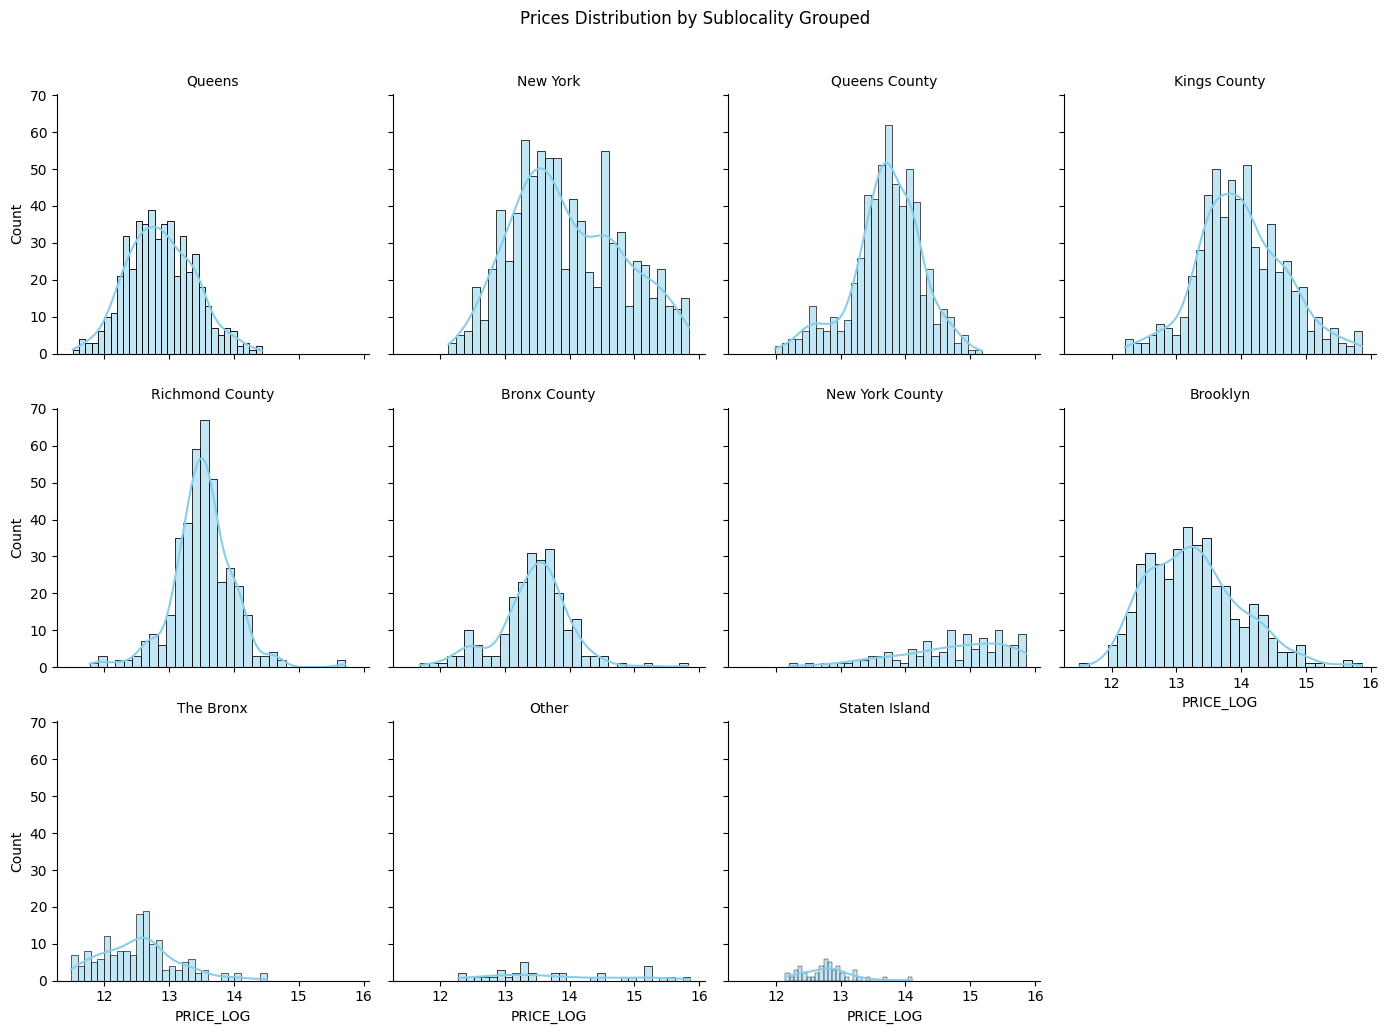

In [52]:
g = sns.FacetGrid(gdf, col="SUBLOCALITY_GROUPED", col_wrap=4, height=3.5, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="PRICE_LOG", bins=30, kde=True, color="skyblue")

g.set_axis_labels("PRICE_LOG", "Count")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Prices Distribution by Sublocality Grouped")
plt.savefig(r"./reports/figures/price_log_by_sublocality.png", dpi=300)
plt.show()

In this case, the data makes more sense since sublocalities are smaller areas within localities.

Even so, there are sublocalities that do not add value, such as "New York," which covers a large area and includes many houses.



#### Cluster Similarity

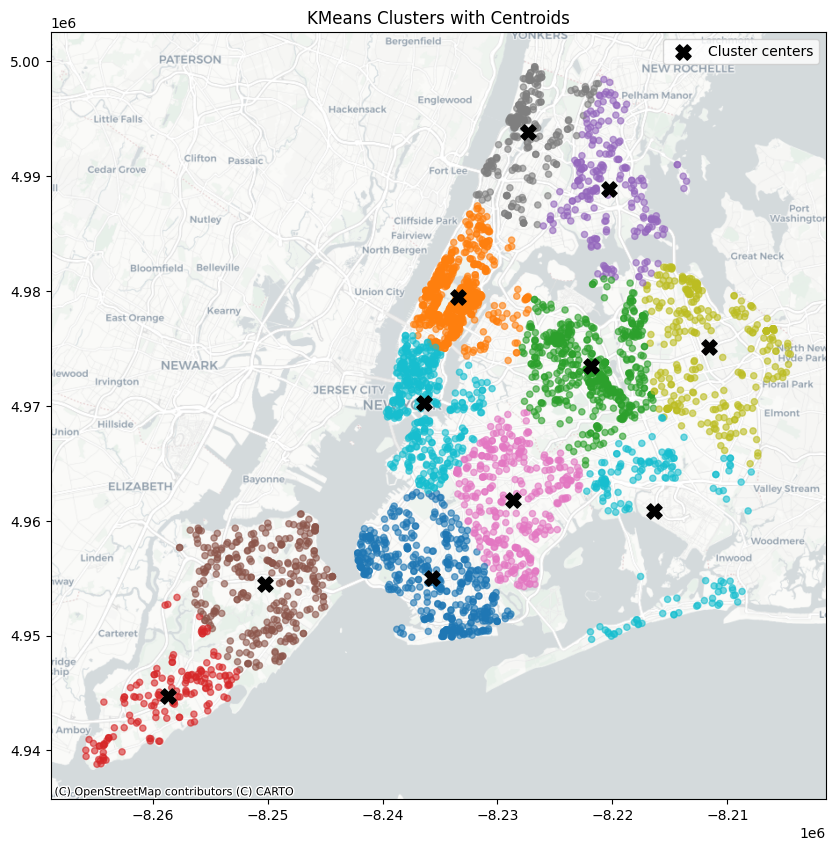

In [53]:
from sklearn.cluster import KMeans

# Create a feature in df that trains of latitude and longitude and creates 10 clusters
kmeans = KMeans(n_clusters=11, random_state=42)

kmeans.fit(df[["LATITUDE", "LONGITUDE"]])

labels = kmeans.labels_

df["ZONE_CLUSTER"] = labels

# --- Geometry for houses ---
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326").to_crs(epsg=3857)

# --- Geometry for centroids ---
centroids = kmeans.cluster_centers_   # lat, lon en orden
centroid_points = [Point(xy[::-1]) for xy in centroids]  # invertir a (lon, lat)
centroids_gdf = gpd.GeoDataFrame(geometry=centroid_points, crs="EPSG:4326").to_crs(epsg=3857)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 10))

# Houses colored by cluster
gdf.plot(
    ax=ax,
    column="ZONE_CLUSTER",
    categorical=True,
    cmap="tab10",
    markersize=20,
    alpha=0.6,
    legend=True
)

# Centroids
centroids_gdf.plot(
    ax=ax,
    color="black",
    markersize=120,
    marker="X",
    label="Cluster centers"
)

#  Basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("KMeans Clusters with Centroids")
plt.savefig(r"./reports/figures/kmeans_clusters.png", dpi=300)
plt.legend()
plt.show()


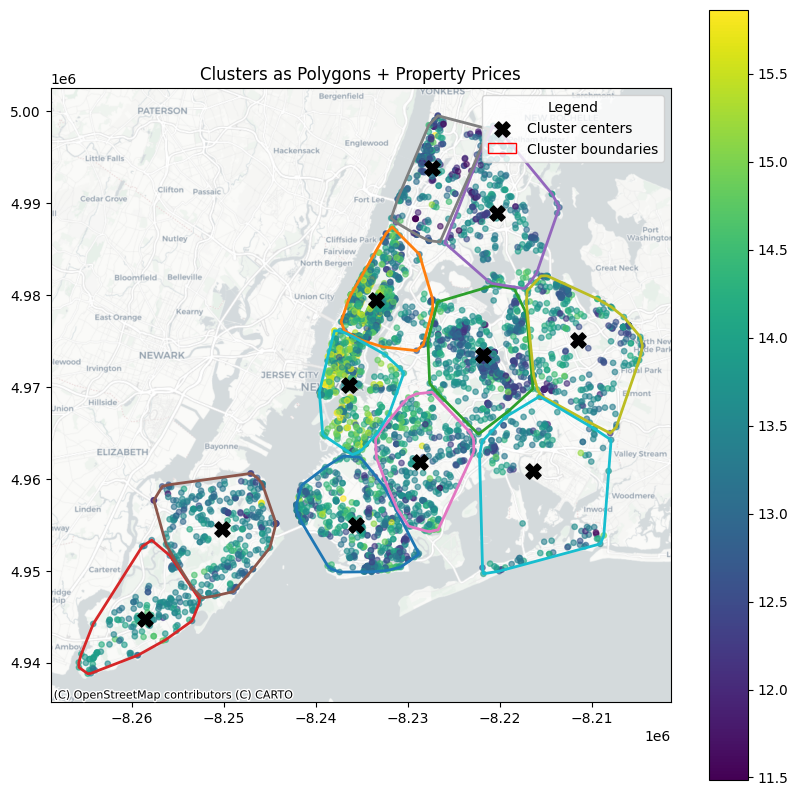

In [54]:
import matplotlib.patches as mpatches

cluster_polygons = []
for cluster_id in np.unique(gdf["ZONE_CLUSTER"]):
    cluster_points = gdf[gdf["ZONE_CLUSTER"] == cluster_id].geometry
    if len(cluster_points) > 2: 
        cluster_polygons.append((cluster_id, cluster_points.union_all().convex_hull))

clusters_gdf = gpd.GeoDataFrame(
    cluster_polygons, columns=["ZONE_CLUSTER", "geometry"], crs=gdf.crs
)

fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    ax=ax,
    column="PRICE_LOG",
    cmap="viridis",
    markersize=15,
    alpha=0.6,
    legend=True
)

clusters_gdf.plot(
    ax=ax,
    column="ZONE_CLUSTER",
    categorical=True,
    cmap="tab10",
    facecolor="none",
    linewidth=2,
    legend=True,
    legend_kwds={"title": "Clusters"}
)

centroids_gdf.plot(
    ax=ax,
    color="black",
    markersize=120,
    marker="X",
    label="Cluster centers"
)

handles, labels = ax.get_legend_handles_labels()
cluster_patch = mpatches.Patch(edgecolor="red", facecolor="none", label="Cluster boundaries")
handles.append(cluster_patch)
ax.legend(handles=handles, title="Legend", loc="upper right")

# Basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Clusters as Polygons + Property Prices")
plt.savefig(r"./reports/figures/kmeans_clusters_polygons.png", dpi=300)
plt.show()

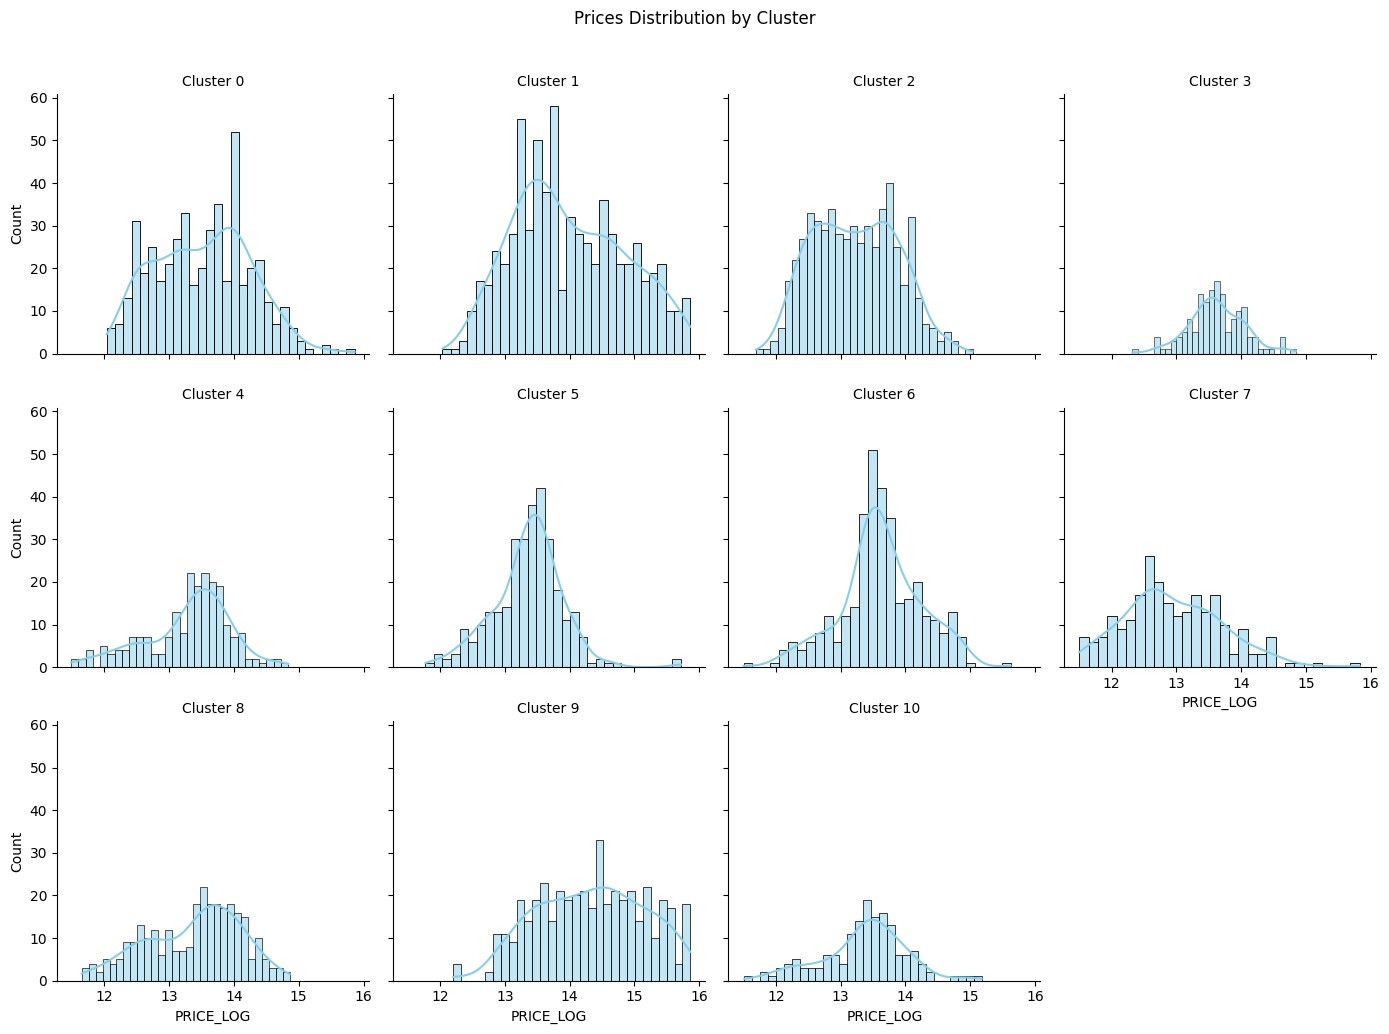

In [55]:
# Create a grid
g = sns.FacetGrid(gdf, col="ZONE_CLUSTER", col_wrap=4, height=3.5, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="PRICE_LOG", bins=30, kde=True, color="skyblue")

g.set_axis_labels("PRICE_LOG", "Count")
g.set_titles("Cluster {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Prices Distribution by Cluster")
plt.savefig(r"./reports/figures/price_log_by_cluster.png", dpi=300)
plt.show()

In [56]:
summary = gdf.groupby("ZONE_CLUSTER")["PRICE_LOG"].agg(["mean", "std", "min", "max", "count"])
print(summary)


                   mean       std        min        max  count
ZONE_CLUSTER                                                  
0             13.515456  0.735157  12.037660  15.863204    470
1             13.994572  0.854617  12.037660  15.863204    695
2             13.223700  0.640924  11.694322  15.038992    555
3             13.621116  0.420885  12.323860  14.845130    154
4             13.297960  0.653670  11.487618  14.837962    216
5             13.360950  0.535323  11.775297  15.717618    300
6             13.621701  0.627723  11.502885  15.623799    342
7             12.950243  0.759203  11.502885  15.830414    241
8             13.379625  0.715307  11.652696  14.862128    286
9             14.332556  0.825705  12.206078  15.863204    440
10            13.366195  0.637029  11.512935  15.176487    158


C:\Users\jpresman\AppData\Local\Temp\ipykernel_24212\2656776841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gdf, x="ZONE_CLUSTER", y="PRICE_LOG", palette="tab10")


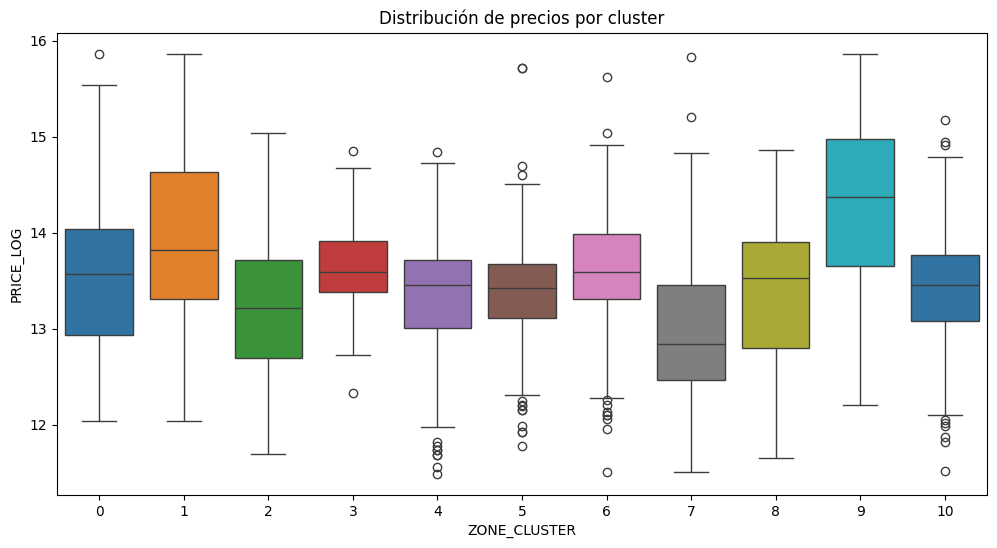

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(data=gdf, x="ZONE_CLUSTER", y="PRICE_LOG", palette="tab10")
plt.title("Distribución de precios por cluster")
plt.show()


Dividing by clusters seems to be the best decision as the data is better grouped and makes sense; they appear to be fairly normal distributions.

##### Save kmeans model for future use

In [58]:
import joblib

joblib.dump(kmeans, r"./models/kmeans_model.joblib")

['./models/kmeans_model.joblib']

### Interaction Features

Combinations of existing features that may capture more complex relationships.

In [59]:
df["BEDS_TIMES_BATH"] = df["BEDS"] * df["BATH"]

df["BATHS_PER_BED"] = df["BATH"] / df["BEDS"]

df.head()

PRICE  BEDS      BATH  PROPERTYSQFT         LOCALITY      SUBLOCALITY  \
1400   129000     3  1.000000   2184.207862    Queens County           Queens   
2974  6000000     4  4.000000   2184.207862  New York County         New York   
3074   709999     4  2.000000   2184.207862         New York    Queens County   
2638  2399000     5  5.000000   2184.207862         New York     Kings County   
4546  1299000     6  2.373861   3733.000000         New York  Richmond County   

       LATITUDE  LONGITUDE PRICE_CAT  PRICE_LOG  ...  SQFT_LOG_RBF  \
1400  40.710451 -73.798206         1  11.767575  ...           1.0   
2974  40.762555 -73.970384         5  15.607270  ...           1.0   
3074  40.681188 -73.793438         3  13.473020  ...           1.0   
2638  40.611552 -73.906198         5  14.690563  ...           1.0   
4546  40.629844 -74.123387         4  14.077106  ...           0.0   

      DIST_TO_MANHATTAN  DIST_TO_JFK_AIRPORT  DIST_TO_LAGUARDIA_AIRPORT  \
1400           0.187629             0.072015                   0.100798   
2974           0.020562             0.227323                   0.097446   
3074           0.204903             0.042735                   0.125104   
2638           0.183451             0.131507                   0.168454   
4546           0.215982             0.345477                   0.289516   

      DIST_TO_TIMES_SQUARE  LOCALITY_GROUPED  SUBLOCALITY_GROUPED  \
1400              0.193235     Queens County               Queens   
2974              0.015787   New York County             New York   
3074              0.206852          New York        Queens County   
2638              0.166541          New York         Kings County   
4546              0.188247          New York      Richmond County   

      ZONE_CLUSTER  BEDS_TIMES_BATH BATHS_PER_BED  
1400             8         3.000000      0.333333  
2974             1        16.000000      1.000000  
3074            10         8.000000      0.500000  
2638             6        25.000000      1.000000  
4546             5        14.243165      0.395643  

[5 rows x 24 columns]

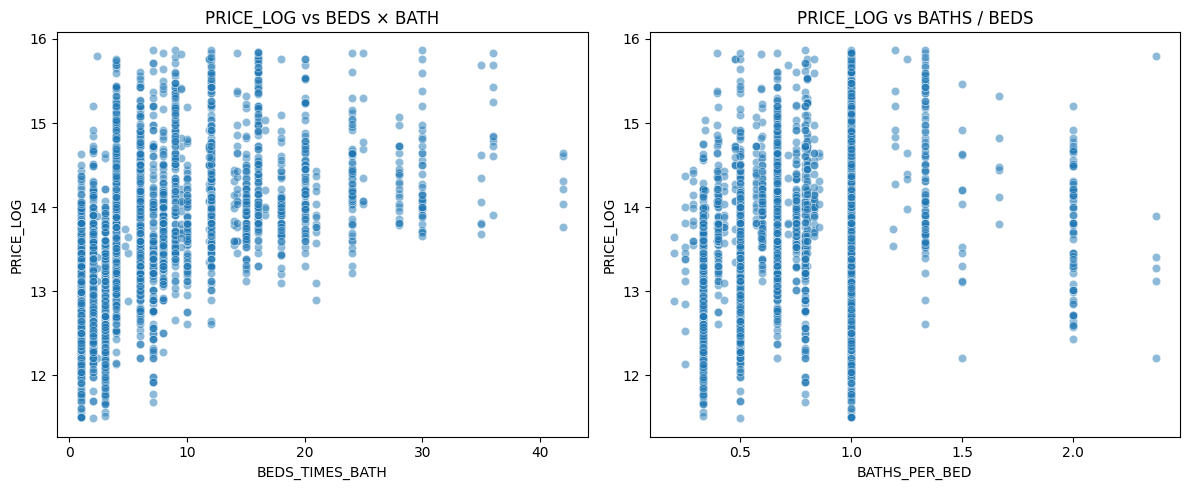

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=df, x="BEDS_TIMES_BATH", y="PRICE_LOG", alpha=0.5, ax=axes[0])
axes[0].set_title("PRICE_LOG vs BEDS × BATH")

sns.scatterplot(data=df, x="BATHS_PER_BED", y="PRICE_LOG", alpha=0.5, ax=axes[1])
axes[1].set_title("PRICE_LOG vs BATHS / BEDS")

plt.tight_layout()
plt.show()

In [61]:
# Codify ZONE_CLUSTER as one hot encoding
df = pd.get_dummies(df, columns=["ZONE_CLUSTER"], prefix="ZONE")

# Training

## Split data into training and validation sets

RMSE por fold (escala original):
 [300248.52999775 163924.26182331 324203.73606972 294155.45598182
 233806.19128083 235565.11399542 260890.15665356 318826.25875793
 136438.44610193 158005.92528844]

Resumen estadístico:
 count        10.000000
mean     242606.407595
std       69545.017562
min      136438.446102
25%      181394.744188
50%      248227.635324
75%      298725.261494
max      324203.736070
dtype: float64

Average price: $1,142,073
Median price:  $769,000
Mean RMSE: 242,606 (21.24% of mean, 31.55% of median)


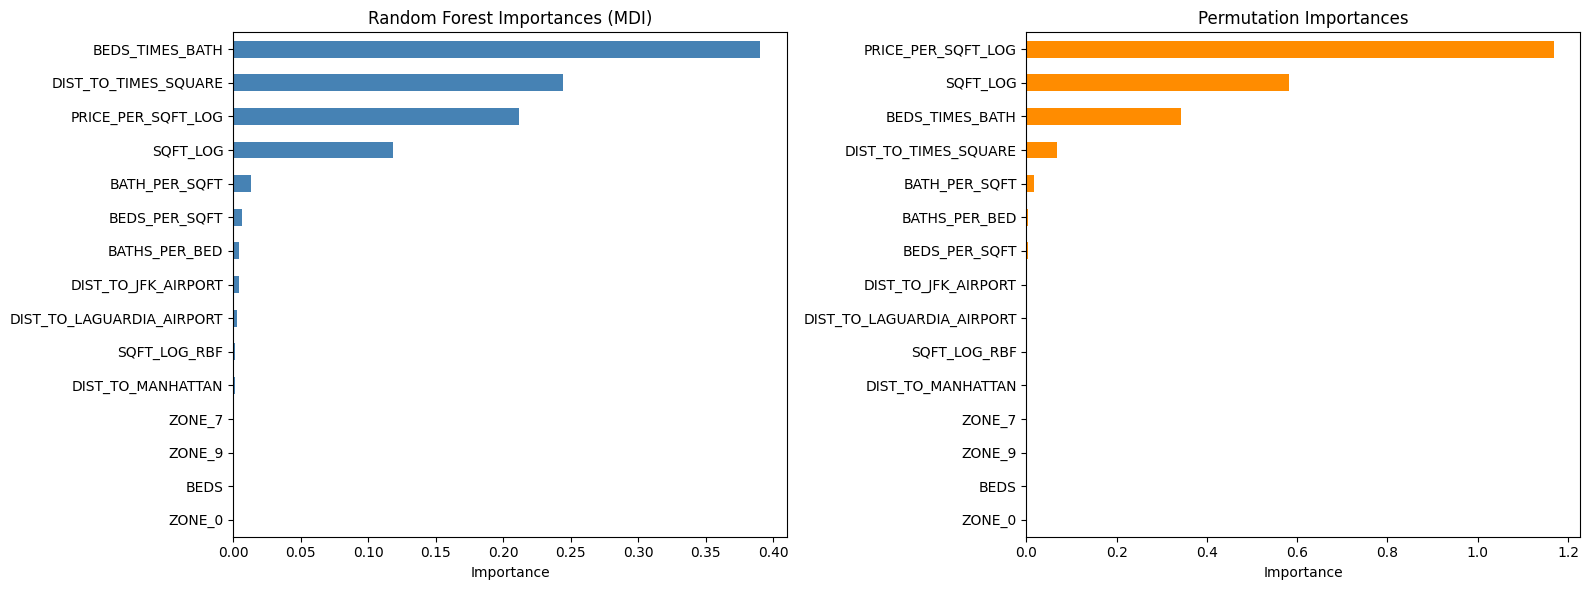

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# -----------------------
# 1. Definición de features
# -----------------------
features = [
    "BEDS", 
    # "BATH", 
    "SQFT_LOG",
    "DIST_TO_MANHATTAN", "DIST_TO_JFK_AIRPORT",
    "DIST_TO_LAGUARDIA_AIRPORT", "DIST_TO_TIMES_SQUARE",
    "BATH_PER_SQFT", "BEDS_PER_SQFT", "PRICE_PER_SQFT_LOG",
    "SQFT_LOG_RBF",
    "ZONE_0","ZONE_1","ZONE_2","ZONE_3","ZONE_4",
    "ZONE_5","ZONE_6","ZONE_7","ZONE_8","ZONE_9","ZONE_10",
    "BEDS_TIMES_BATH", "BATHS_PER_BED"
]

X_train = df[features]
y_train = df["PRICE_LOG"]

# -----------------------
# 2. Modelo
# -----------------------
model = RandomForestRegressor(
    max_depth=10, 
    n_estimators=100, 
    random_state=42,
    n_jobs=-1
)

# -----------------------
# 3. Scorer personalizado: RMSE en escala original
# -----------------------
def rmse_original(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)   # destransformar
    y_pred = np.expm1(y_pred_log)
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_original, greater_is_better=False)

# -----------------------
# 4. Cross-validation
# -----------------------
scores = cross_val_score(model, X_train, y_train, cv=10, scoring=rmse_scorer)
rmse_scores = -scores  # invertir signo

print("RMSE por fold (escala original):\n", rmse_scores)
print("\nResumen estadístico:\n", pd.Series(rmse_scores).describe())

# Error relativo al precio medio/mediano
avg_price = np.expm1(y_train).mean()
median_price = np.expm1(y_train).median()
print(f"\nAverage price: ${avg_price:,.0f}")
print(f"Median price:  ${median_price:,.0f}")
print(f"Mean RMSE: {rmse_scores.mean():,.0f} "
      f"({100*rmse_scores.mean()/avg_price:.2f}% of mean, "
      f"{100*rmse_scores.mean()/median_price:.2f}% of median)")
      
# -----------------------
# 5. Entrenar modelo final y calcular importancias
# -----------------------
model.fit(X_train, y_train)

# (A) Importancia nativa del RandomForest
rf_importances = pd.Series(model.feature_importances_, index=features)

# (B) Importancia por permutación (más robusta)
perm_result = permutation_importance(model, X_train, y_train, 
                                     n_repeats=10, random_state=42, n_jobs=-1)
perm_importances = pd.Series(perm_result.importances_mean, index=features)

# -----------------------
# 6. Plot de importancias
# -----------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot RF nativo
rf_importances.sort_values().tail(15).plot.barh(ax=axes[0], color="steelblue")
axes[0].set_title("Random Forest Importances (MDI)")
axes[0].set_xlabel("Importance")

# Plot permutation importance
perm_importances.sort_values().tail(15).plot.barh(ax=axes[1], color="darkorange")
axes[1].set_title("Permutation Importances")
axes[1].set_xlabel("Importance")

plt.tight_layout()
plt.show()


In [63]:
# Convertir precios a escala original
y_train_original = np.expm1(y_train)

# Calcular media y mediana
avg_price = y_train_original.mean()
median_price = y_train_original.median()

print(f"Precio medio:   ${avg_price:,.0f}")
print(f"Precio mediano: ${median_price:,.0f}\n")

# Imprimir métricas por fold
for i, score in enumerate(rmse_scores, 1):
    rel_avg = 100 * score / avg_price
    rel_median = 100 * score / median_price
    print(f"Fold {i}: RMSE = ${score:,.0f} "
          f"({rel_avg:.2f}% of mean, {rel_median:.2f}% of median)")

# Resumen global
mean_rmse = np.mean(rmse_scores)
rel_avg_mean = 100 * mean_rmse / avg_price
rel_median_mean = 100 * mean_rmse / median_price

print("\n--- Resumen ---")
print(f"RMSE medio = ${mean_rmse:,.0f}")
print(f"Relativo a media:   {rel_avg_mean:.2f}%")
print(f"Relativo a mediana: {rel_median_mean:.2f}%")


Precio medio:   $1,142,073
Precio mediano: $769,000

Fold 1: RMSE = $300,249 (26.29% of mean, 39.04% of median)
Fold 2: RMSE = $163,924 (14.35% of mean, 21.32% of median)
Fold 3: RMSE = $324,204 (28.39% of mean, 42.16% of median)
Fold 4: RMSE = $294,155 (25.76% of mean, 38.25% of median)
Fold 5: RMSE = $233,806 (20.47% of mean, 30.40% of median)
Fold 6: RMSE = $235,565 (20.63% of mean, 30.63% of median)
Fold 7: RMSE = $260,890 (22.84% of mean, 33.93% of median)
Fold 8: RMSE = $318,826 (27.92% of mean, 41.46% of median)
Fold 9: RMSE = $136,438 (11.95% of mean, 17.74% of median)
Fold 10: RMSE = $158,006 (13.84% of mean, 20.55% of median)

--- Resumen ---
RMSE medio = $242,606
Relativo a media:   21.24%
Relativo a mediana: 31.55%
